# Exploratory data analysis
- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data
    Note: Above you have your data set in a folder but for further reference here is the data set 

# Visualization
- Plot your data in a meaningful way
## Predictions
- Do you have any hypothesis?
- Can you make any kind of prediction: regression and/or classification?
# Storytelling
- What metrics are you obtaining?
- Explain your conclusions
- Shape your new data and conclusions in such a way that is appealing to the listener and tells a story

In [40]:
import pandas as pd
import seaborn as sns

In [3]:
file = "data/measurements.csv"
df = pd.read_csv(file)

In [4]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
# Dropping columns with with high number of missing values as they will not contribute to the analysis.
df.drop(columns=["specials","refill liters","refill gas"],inplace=True)
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [7]:
#cheking data types
df.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [24]:
df.distance = df.distance.str.replace(',', '.').astype(float)
df.consume = df.consume.str.replace(',', '.').astype(float)


AttributeError: Can only use .str accessor with string values!

In [ ]:
df.dtypes

In [18]:
# Making a new column for fuel economy as km\L 
df["fuel_economy"] = df.apply(lambda x: x.distance / x.consume, axis=1)
df["fuel_economy"] = round(df["fuel_economy"],2)
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,fuel_economy
0,28.0,5.0,26,"21,5",12,E10,0,0,0,5.60
1,12.0,4.2,30,"21,5",13,E10,0,0,0,2.86
2,11.2,5.5,38,"21,5",15,E10,0,0,0,2.04
3,12.9,3.9,36,"21,5",14,E10,0,0,0,3.31
4,18.5,4.5,46,"21,5",15,E10,0,0,0,4.11


In [25]:
df.gas_type = df.gas_type.astype(str)

In [36]:
# fuel economy by fuel type
bygas = df.groupby("gas_type")

4.471875

In [38]:
# the higher the fuel economy the better
E10_ERating = round(bygas.get_group("E10").fuel_economy.mean(),2)
print(f"The fuel economy rating of E10 fuel is {E10_ERating}")

The fuel economy rating of E10 fuel is 4.47


In [39]:
SP98_ERating = round(bygas.get_group("SP98").fuel_economy.mean(),2)
print(f"The fuel economy rating of SP98 fuel is {SP98_ERating}")

The fuel economy rating of SP98 fuel is 4.01


In [45]:
df.consume = df.consume.where(df.consume < 6.5)
df.distance = df.distance.where(df.distance < 50)

C:\Users\Shach\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


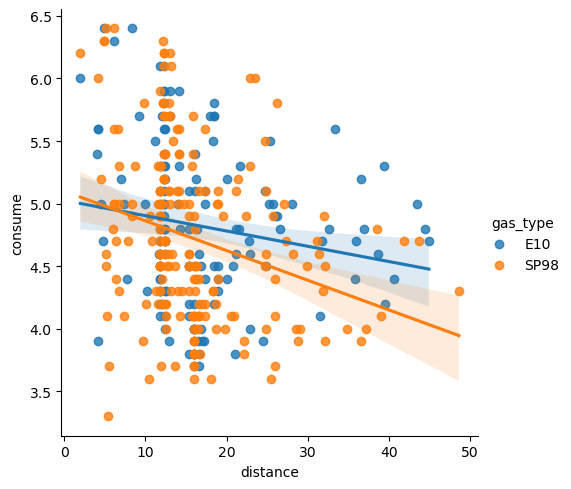

In [48]:
# It seems to me that E10 is more efficient for short trips, and SP98 is better for longer trips.
sns.lmplot(df,x = "distance",y="consume", hue="gas_type")

C:\Users\Shach\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


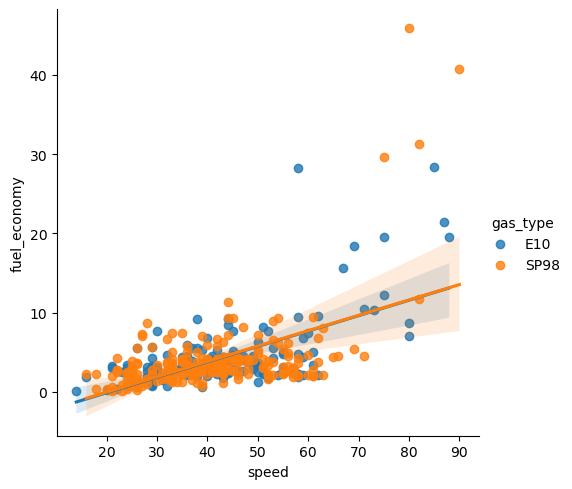

In [49]:
# check speed and fuel economy
sns.lmplot(df,x = "speed",y="fuel_economy", hue="gas_type")